## Całkowanie numeryczne podstawy 

#### Zadanie 1:
Zaimplementuj 3 podstawowe algorytmy całkowania:

* wzór prostokątów,
* wzór trapezów
* wzór Simpsona

In [57]:
# Rectangular
def rectangular_rule(function, a, b, n ):
    total = 0.0
    step = float(b - a) / n
    for i in range(0, n):
        total += function(a + i * step)
    return step * total

# Trapezoidal
def trapezoidal_rule(function, a, b, n):
    total = 0.0
    step = float(b - a) / n
    total += function(a) / 2
    total += function(b) / 2
    for i in range (1, n):
        total += function(a + i * step )
    return step * total
    
# Simpson
def simpsone_rule(function, a , b, n):
    total = 0.0
    step = float(b - a) / n
    x = a + step
    for i in range(1, int(n / 2 + 1)):
        total += 4 * function(x)
        x += 2 * step
    x = a + 2 * step
    for i in range(1, int(n / 2)):
        total += 2 * function(x)
        x += 2 * step
    return step / 3 * (function(a) + function(b) + total)

#### Zadanie 2"
Przetestuj działanie algorytmów dla różnych funkcji (zwizualizuj te funkcje!):

* $f(x) = x$
* $f(x) = 2 * x^2$
* $f(x) = 4*sin(x)$
* $f(x) = e^x$
* $f(x) = x*sin^2(x)+2*cos(x)$
* $f(x) = cos(\frac{(x+1)}{(x^2+0.04)})*e^x$

Oblicz dokładne wartości całek oznaczonych!. 

Sprawdź zachowanie implementacji dla kilku różnych przedziałów całkowania (min. 3)

Sprawdź różnice w dokładności dla różnych wartości kroków całkowania (min. 3)


In [58]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import scipy.integrate as integrate

def draw_diagram(function, a, b, n, func_name):
    x_axis = np.linspace(a, b, n)
    plt.plot(x_axis, np.vectorize(function)(x_axis), label=func_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(func_name)
    plt.show()

def integral_comparison(a, b, n):
    integral_for_function(lambda x: 2*x**2, a, b, n, "2*x^2")
    integral_for_function(lambda x: 4*np.sin(x), a, b, n, "4*sin(x)")
    integral_for_function(lambda x: np.exp(x), a, b, n, "e^x")
    integral_for_function(lambda x: x*np.sin(x) ** 2 + 2*np.cos(x), a, b, n, "x*sin^2(x) + 2*cos(x)")
    integral_for_function(lambda x: np.cos((x + 1) / (x**2 + 0.04)) * np.exp(x), a, b, n, "cos((x+1)/(x^2 + 0.04))*e^x")
    
def integral_for_function(function, a, b, n, func_name):
    draw_diagram(function, a, b, n, func_name)
    rect = rectangular_rule(function, a, b, n)
    trap = trapezoidal_rule(function, a, b, n)
    simp = simpsone_rule(function, a, b, n)
    base_val = integrate.quad(function, a, b)[0]  # used as a reference value of an integral
    if base_val == 0:
        rect_rel_err = "Undefined"
        trap_rel_err = "Undefined"
        simp_rel_err = "Undefined"
    else:
        rect_rel_err = (abs(rect - base_val) / base_val)*100
        trap_rel_err = (abs(trap - base_val) / base_val)*100
        simp_rel_err = (abs(simp - base_val) / base_val)*100

    table = [["Quad integral (SciPy)", base_val, 0, 0],
             ["Rectangular rule", rect, rect_rel_err, abs(rect - base_val)],
             ["Trapezoidal rule", trap, trap_rel_err, abs(trap - base_val)],
             ["Simpson's rule", simp, simp_rel_err, abs(simp - base_val)]]
    print(tabulate(table, headers=["Integration method", "Value of the definite integral", "Relative error [%]",
                                   "Absolute error"], tablefmt="grid", floatfmt=".10f"))


#     (0, 10)

### 2 steps

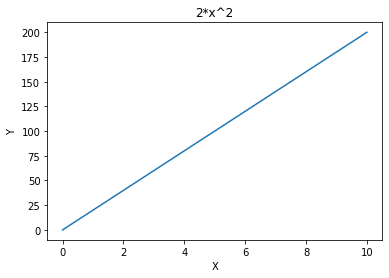

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   250.0000000000 |        62.5000000000 |   416.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   750.0000000000 |        12.5000000000 |    83.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

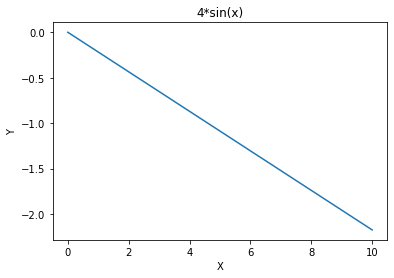

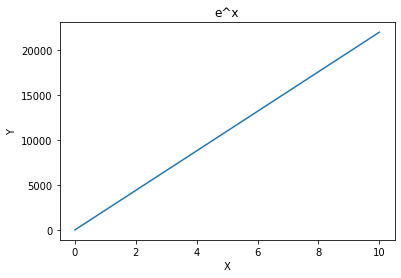

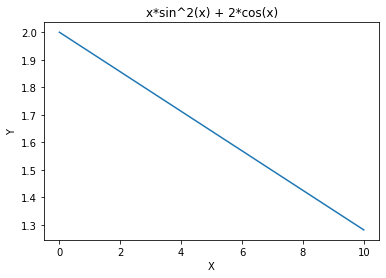

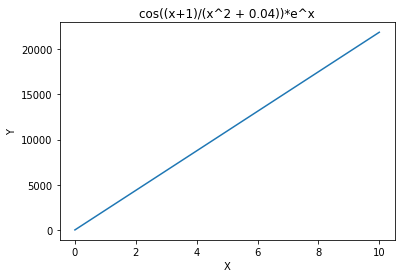

In [59]:
integral_comparison(0, 10, 2)


### 8 steps

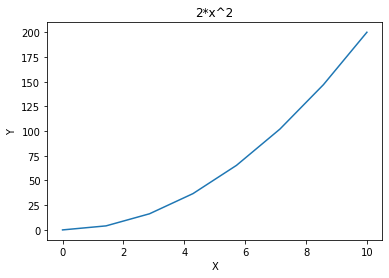

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   546.8750000000 |        17.9687500000 |   119.7916666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   671.8750000000 |         0.7812500000 |     5.2083333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

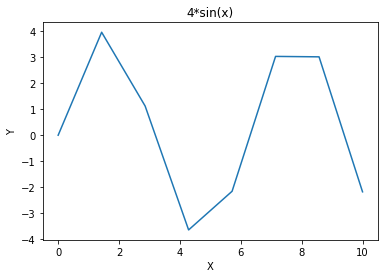

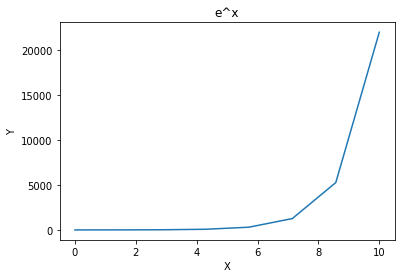

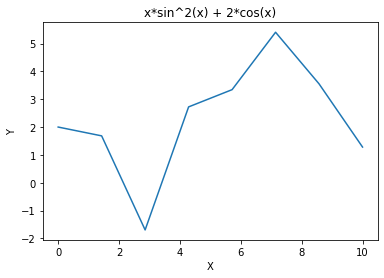

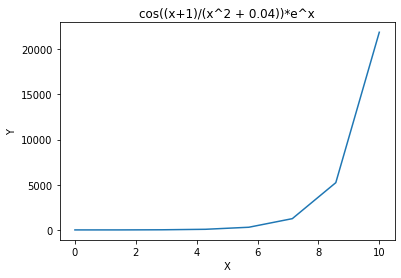

In [60]:
integral_comparison(0, 10, 8)


### 12 steps

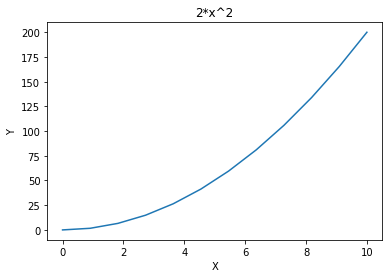

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   585.6481481481 |        12.1527777778 |    81.0185185185 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   668.9814814815 |         0.3472222222 |     2.3148148148 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

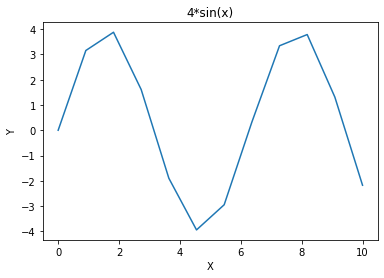

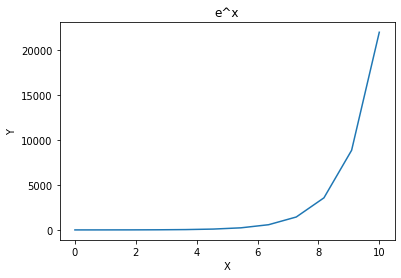

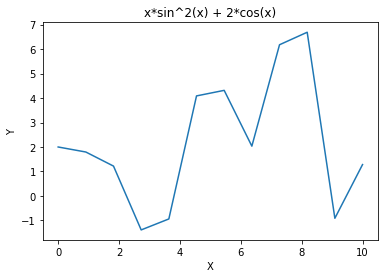

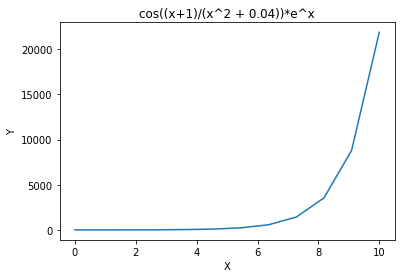

In [61]:
integral_comparison(0, 10, 12)

### 12 steps

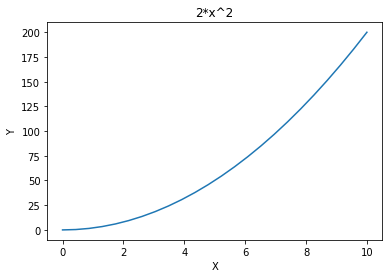

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   625.5787037037 |         6.1631944444 |    41.0879629630 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   667.2453703704 |         0.0868055556 |     0.5787037037 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

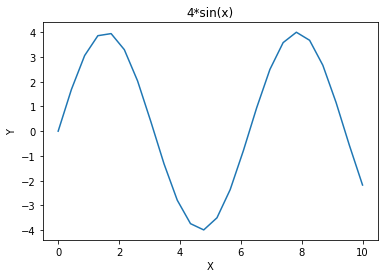

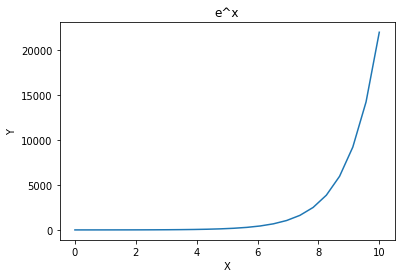

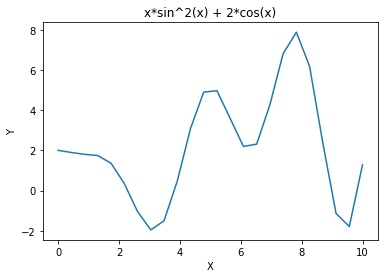

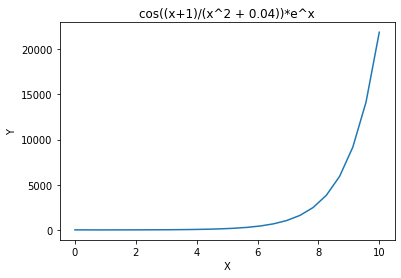

In [62]:
integral_comparison(0, 10, 24)

### 12 steps

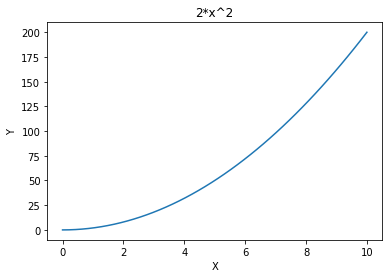

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   645.9780092593 |         3.1032986111 |    20.6886574074 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   666.8113425926 |         0.0217013889 |     0.1446759259 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

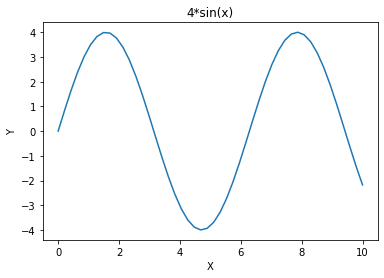

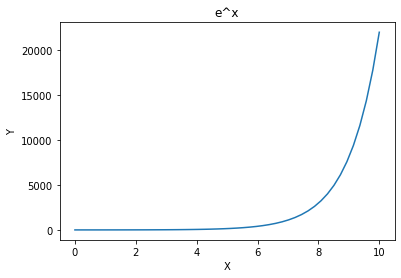

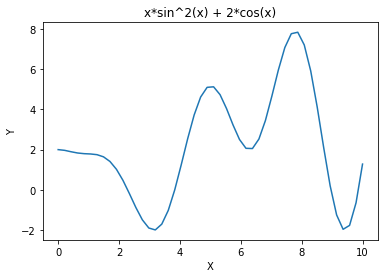

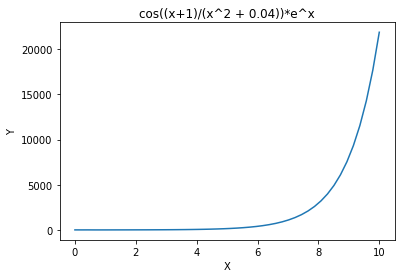

In [63]:
integral_comparison(0, 10, 48)

### 12 steps

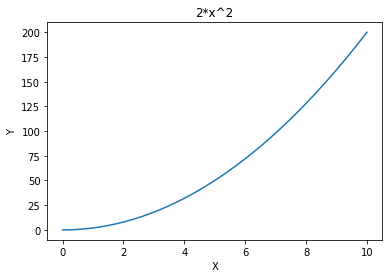

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                   666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                   656.2861689815 |         1.5570746528 |    10.3804976852 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                   666.7028356481 |         0.0054253472 |     0.0361689815 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                   666.6666666667 |         0.00

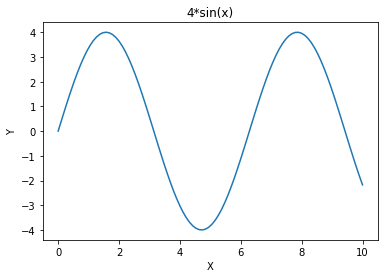

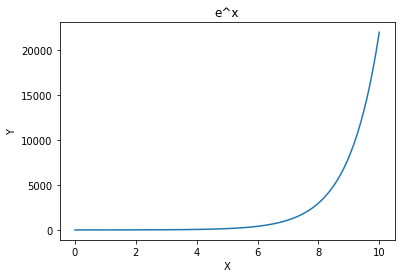

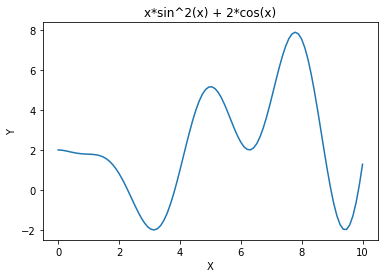

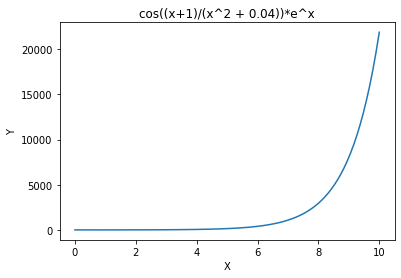

In [64]:
integral_comparison(0, 10, 96)






# (-25, 25)

###  2 steps

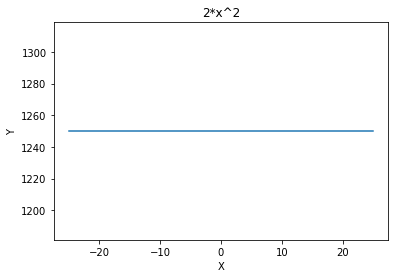

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 20833.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 31250.0000000000 |        50.0000000000 | 10416.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 31250.0000000000 |        50.0000000000 | 10416.6666666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 20833.3333333333 |         0.00

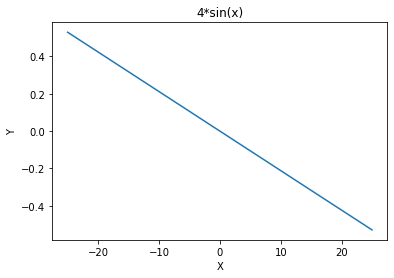

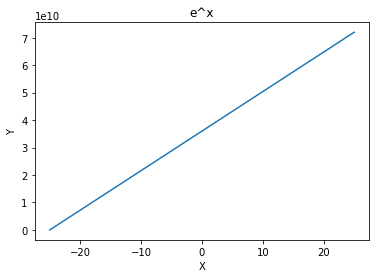

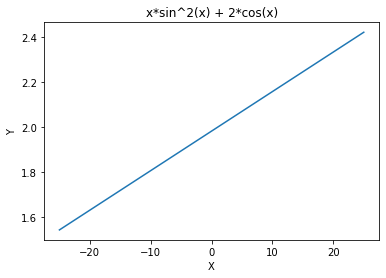

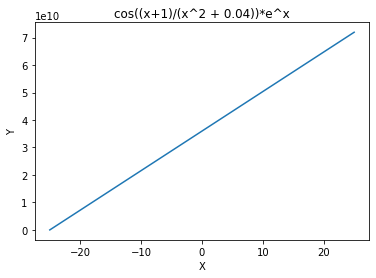

In [65]:
integral_comparison(-25, 25, 2)


### 8 steps

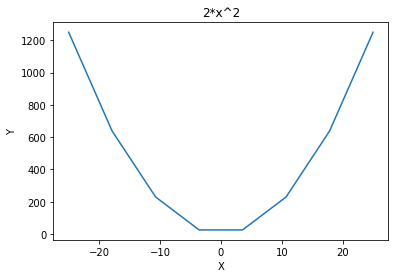

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 20833.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 21484.3750000000 |         3.1250000000 |   651.0416666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 21484.3750000000 |         3.1250000000 |   651.0416666667 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 20833.3333333333 |         0.00

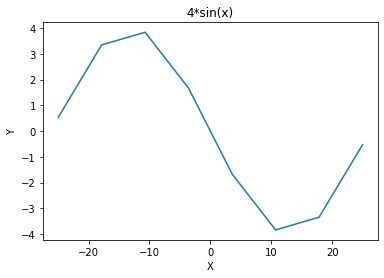

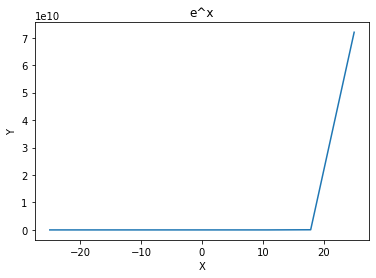

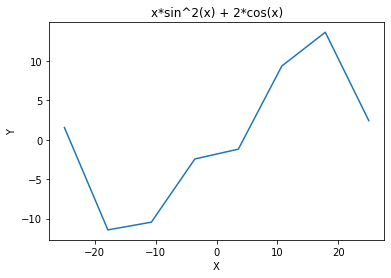

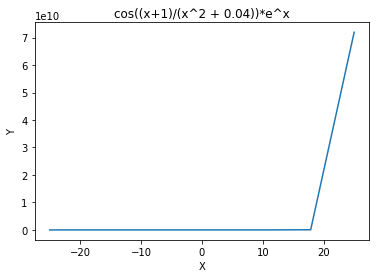

In [66]:
integral_comparison(-25, 25, 8)


### 12 steps

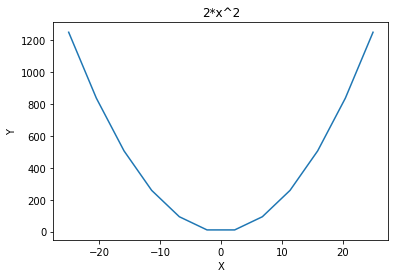

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 20833.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 21122.6851851852 |         1.3888888889 |   289.3518518519 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 21122.6851851852 |         1.3888888889 |   289.3518518519 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 20833.3333333333 |         0.00

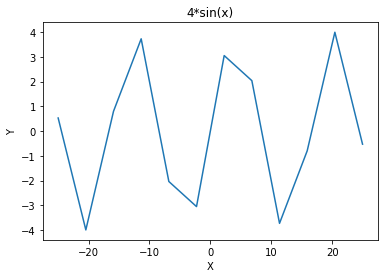

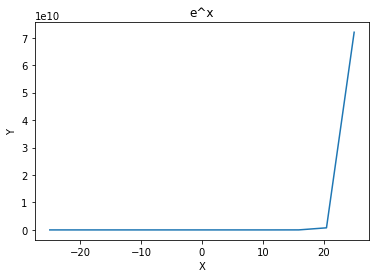

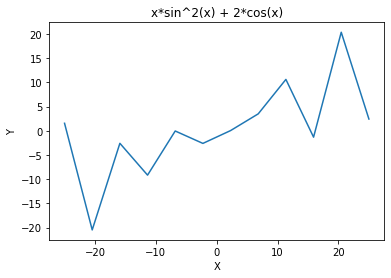

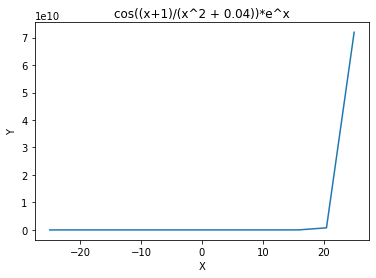

In [67]:
integral_comparison(-25, 25, 12)

### 24 steps

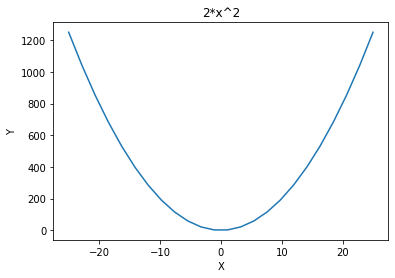

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 20833.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 20905.6712962963 |         0.3472222222 |    72.3379629630 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 20905.6712962963 |         0.3472222222 |    72.3379629630 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 20833.3333333333 |         0.00

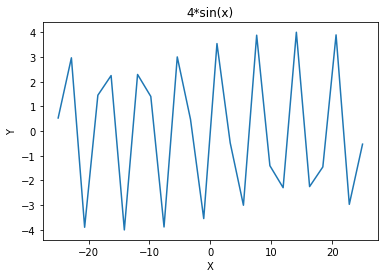

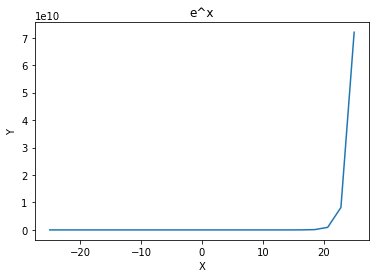

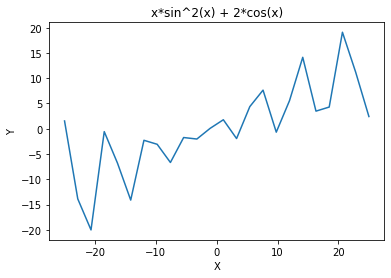

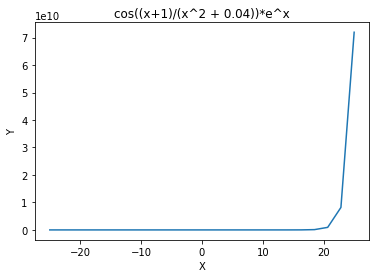

In [68]:
integral_comparison(-25, 25, 24)

### 48 steps

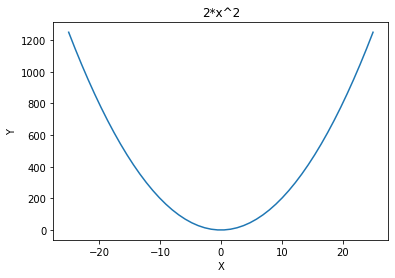

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 20833.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 20851.4178240741 |         0.0868055556 |    18.0844907407 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 20851.4178240741 |         0.0868055556 |    18.0844907407 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 20833.3333333333 |         0.00

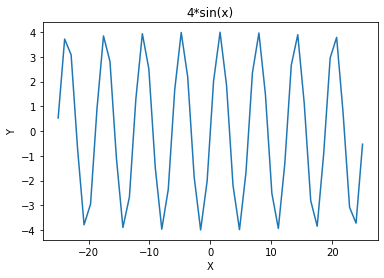

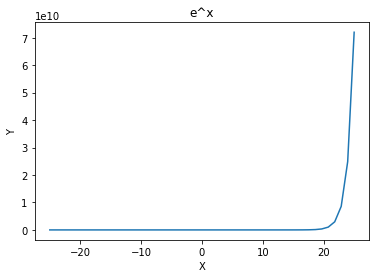

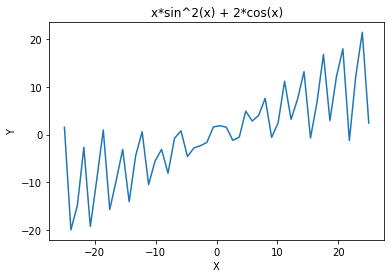

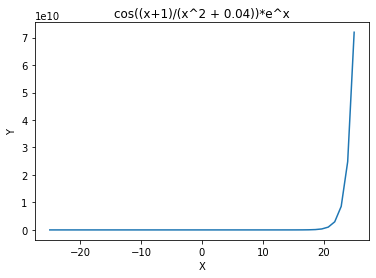

In [69]:
integral_comparison(-25, 25, 48)

### 96 steps

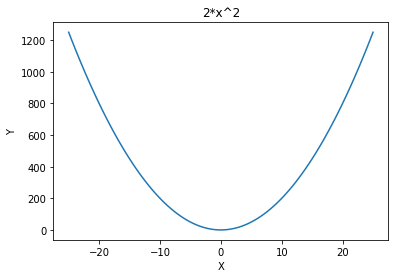

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 20833.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 20837.8544560185 |         0.0217013889 |     4.5211226852 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 20837.8544560185 |         0.0217013889 |     4.5211226852 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 20833.3333333333 |         0.00

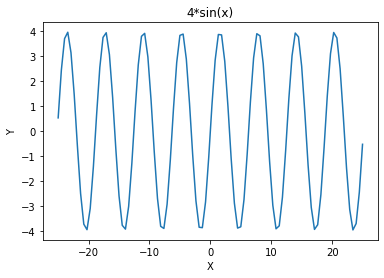

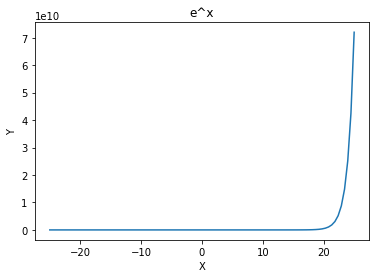

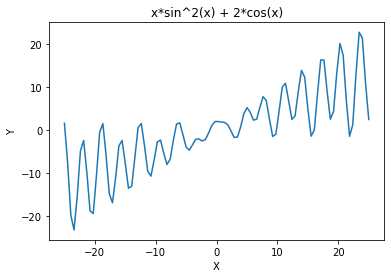

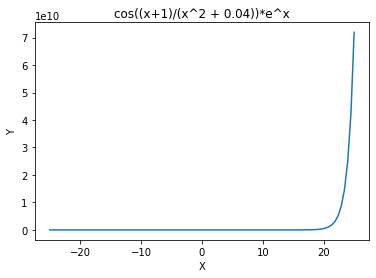

In [70]:
integral_comparison(-25, 25, 96)

### 192 steps

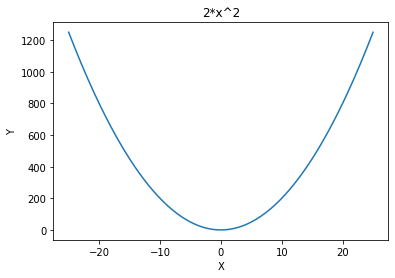

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 20833.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 20834.4636140046 |         0.0054253472 |     1.1302806713 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 20834.4636140046 |         0.0054253472 |     1.1302806713 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 20833.3333333334 |         0.00

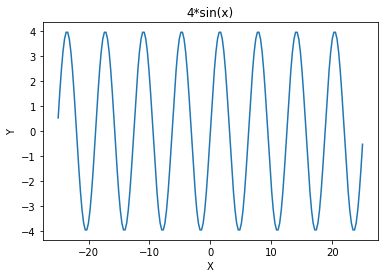

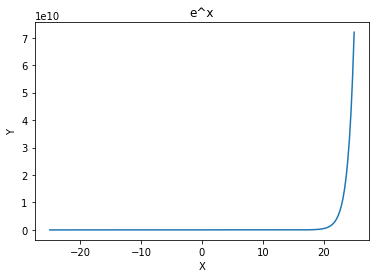

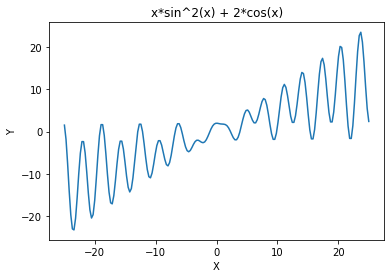

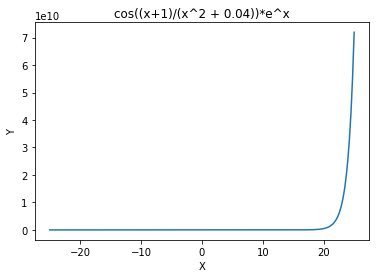

In [71]:
integral_comparison(-25, 25, 192)

### 384 steps

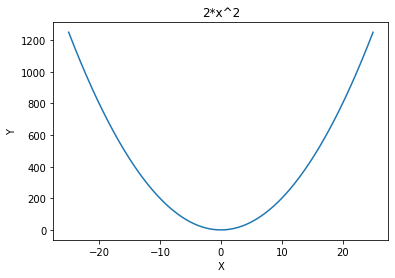

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                 20833.3333333333 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                 20833.6159035012 |         0.0013563368 |     0.2825701679 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                 20833.6159035012 |         0.0013563368 |     0.2825701679 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                 20833.3333333333 |         0.00

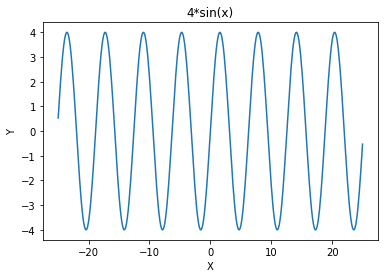

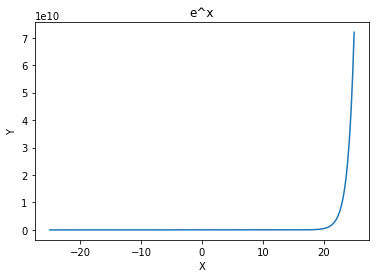

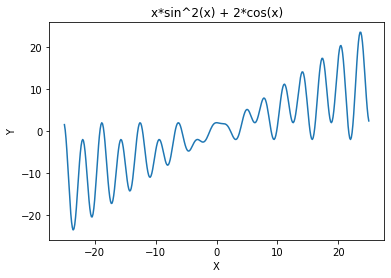

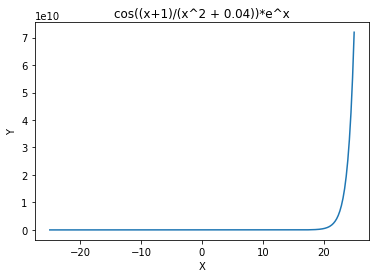

In [72]:
integral_comparison(-25, 25, 384)





# (-100, 100)

###  2 steps

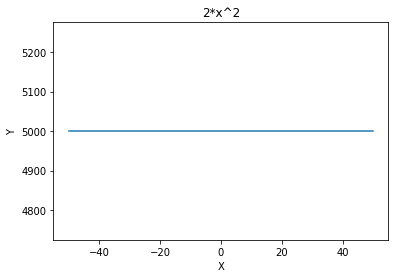

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                166666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                250000.0000000000 |        50.0000000000 | 83333.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                250000.0000000000 |        50.0000000000 | 83333.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                166666.6666666667 |         0.00

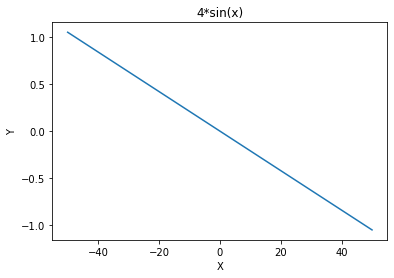

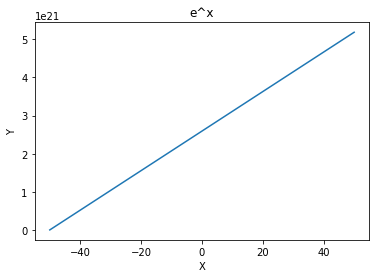

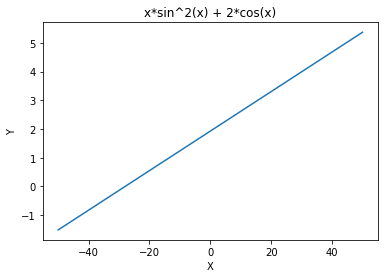

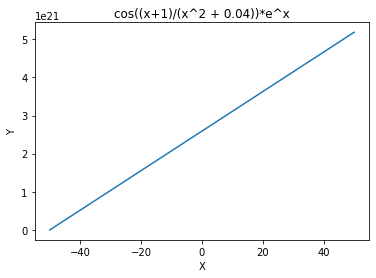

In [73]:
integral_comparison(-50, 50, 2)


### 8 steps

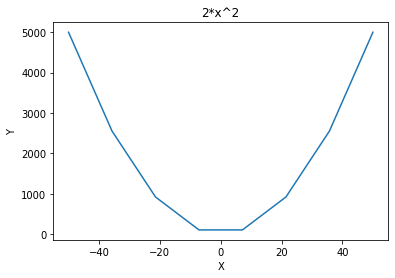

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                166666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                171875.0000000000 |         3.1250000000 |  5208.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                171875.0000000000 |         3.1250000000 |  5208.3333333333 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                166666.6666666667 |         0.00

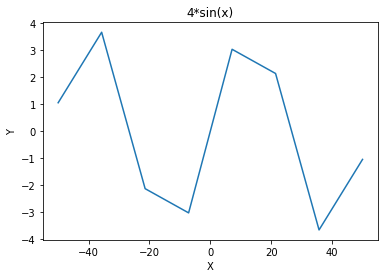

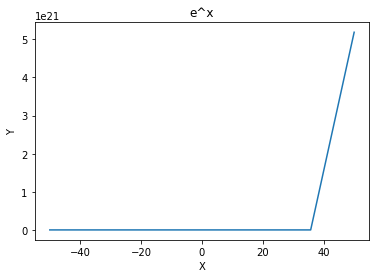

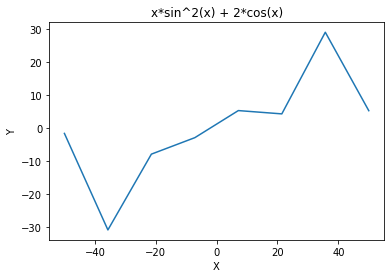

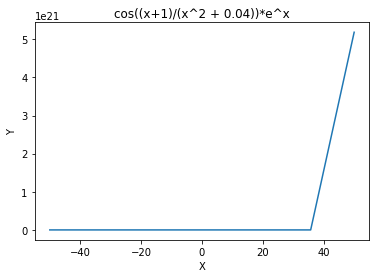

In [74]:
integral_comparison(-50, 50, 8)


### 12 steps

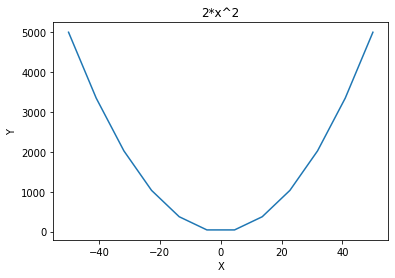

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                166666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                168981.4814814815 |         1.3888888889 |  2314.8148148148 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                168981.4814814815 |         1.3888888889 |  2314.8148148148 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                166666.6666666667 |         0.00

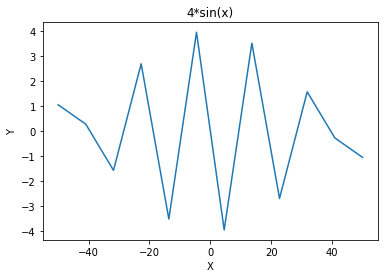

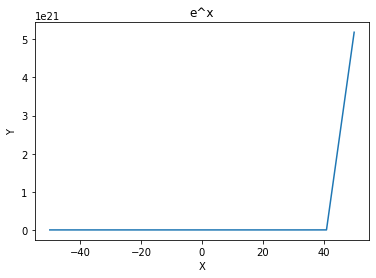

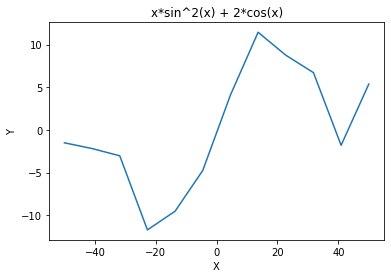

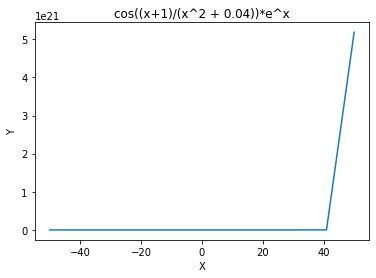

In [75]:
integral_comparison(-50, 50, 12)

### 24 steps

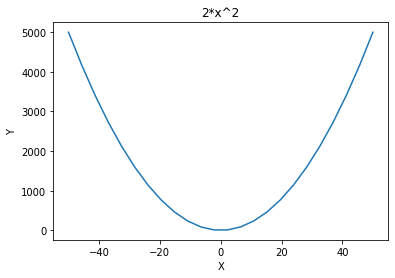

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                166666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                167245.3703703704 |         0.3472222222 |   578.7037037037 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                167245.3703703704 |         0.3472222222 |   578.7037037037 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                166666.6666666667 |         0.00

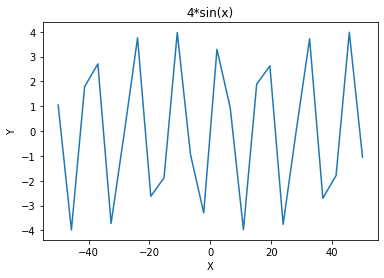

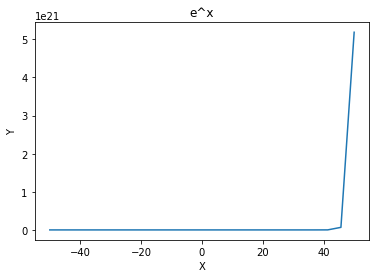

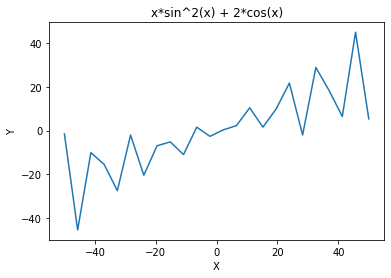

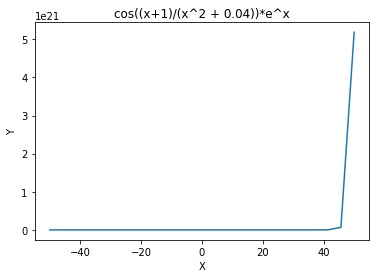

In [76]:
integral_comparison(-50, 50, 24)

### 48 steps

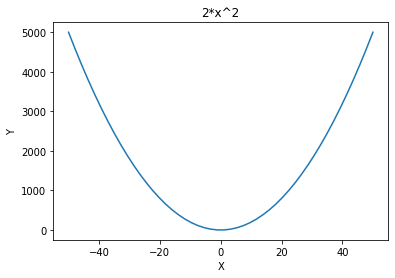

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                166666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                166811.3425925926 |         0.0868055556 |   144.6759259259 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                166811.3425925926 |         0.0868055556 |   144.6759259259 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                166666.6666666667 |         0.00

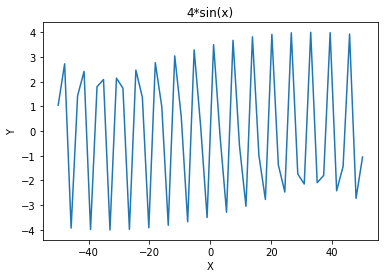

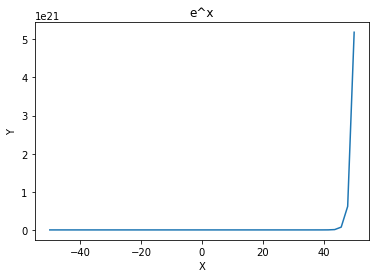

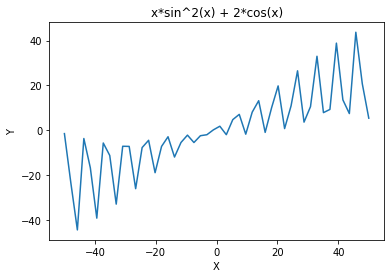

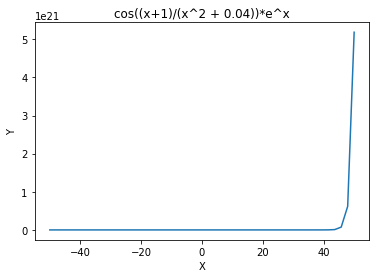

In [77]:
integral_comparison(-50, 50, 48)

### 96 steps

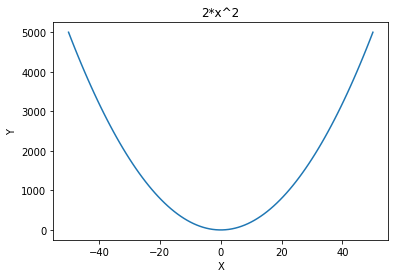

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                166666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                166702.8356481482 |         0.0217013889 |    36.1689814815 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                166702.8356481482 |         0.0217013889 |    36.1689814815 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                166666.6666666667 |         0.00

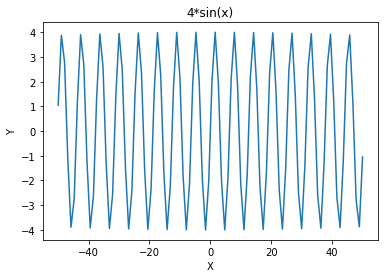

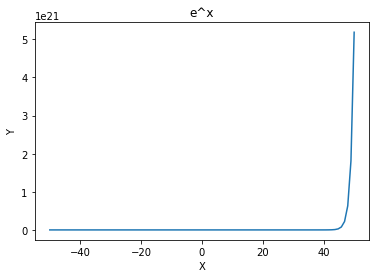

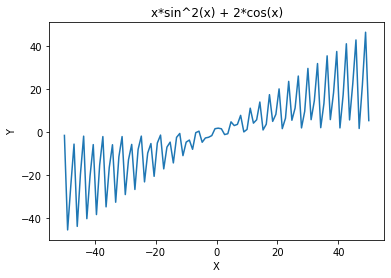

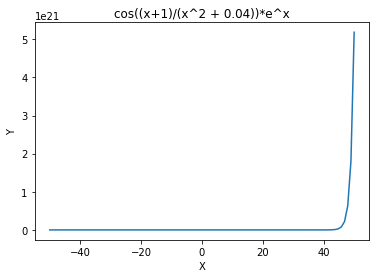

In [78]:
integral_comparison(-50, 50, 96)

### 192 steps

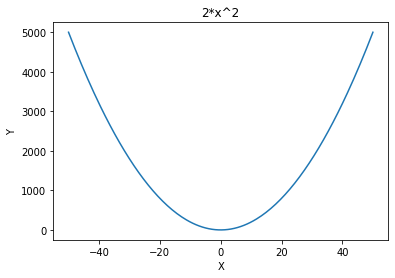

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                166666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                166675.7089120369 |         0.0054253472 |     9.0422453702 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                166675.7089120369 |         0.0054253472 |     9.0422453702 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                166666.6666666668 |         0.00

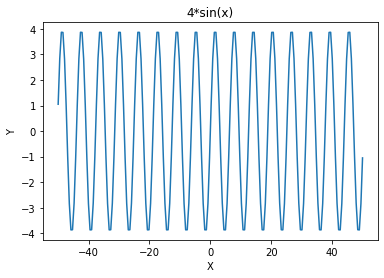

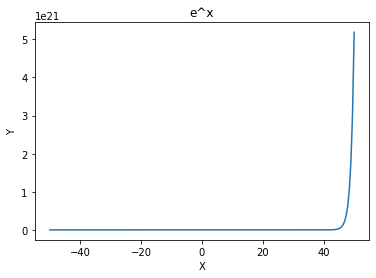

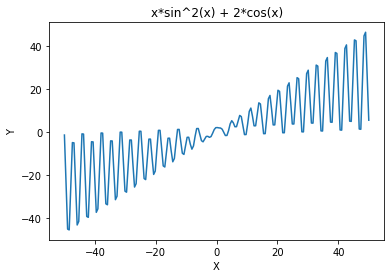

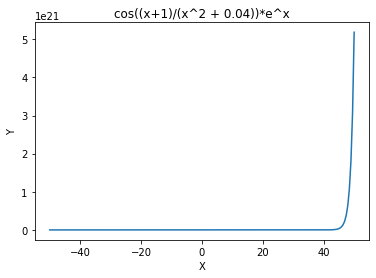

In [79]:
integral_comparison(-50, 50, 192)

### 384 steps

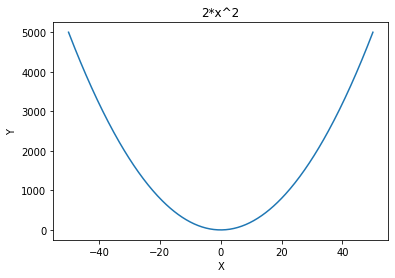

+-----------------------+----------------------------------+----------------------+------------------+
| Integration method    |   Value of the definite integral |   Relative error [%] |   Absolute error |
+=======================+==================================+======================+==================+
| Quad integral (SciPy) |                166666.6666666667 |         0.0000000000 |     0.0000000000 |
+-----------------------+----------------------------------+----------------------+------------------+
| Rectangular rule      |                166668.9272280095 |         0.0013563368 |     2.2605613428 |
+-----------------------+----------------------------------+----------------------+------------------+
| Trapezoidal rule      |                166668.9272280095 |         0.0013563368 |     2.2605613428 |
+-----------------------+----------------------------------+----------------------+------------------+
| Simpson's rule        |                166666.6666666665 |         0.00

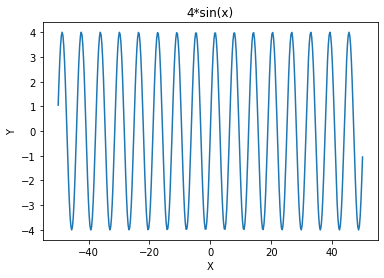

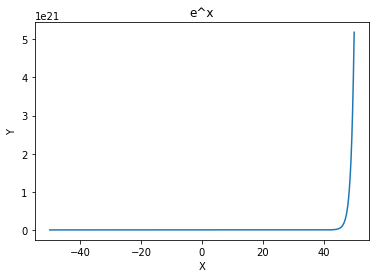

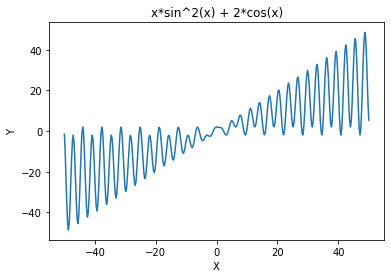

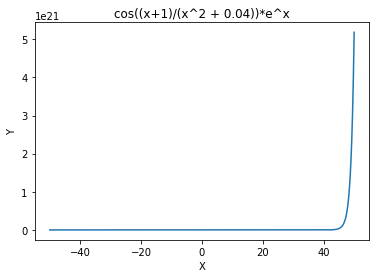

In [80]:
integral_comparison(-50, 50, 384)